In [2]:
import requests
import json
import pandas as pd
from getpass import getpass
import folium
from folium import Choropleth, Circle, Marker, Icon, Map
from folium.plugins import HeatMap, MarkerCluster
import os
from getpass import getpass
import geopandas as gpd
from cartoframes.viz import Map, Layer, popup_element
from dotenv import load_dotenv
import time
from pymongo import MongoClient

In [3]:
client = MongoClient("localhost:27017")

In [4]:
db = client["ironhack"]
db

Database(MongoClient(host=['localhost:27017'], document_class=dict, tz_aware=False, connect=True), 'ironhack')

In [5]:
db.list_collection_names()

['nyneigh', 'nyrest', 'companies', 'restaurants']

In [6]:
c = db.get_collection("companies")

In [7]:
c.find_one()

{'_id': ObjectId('52cdef7c4bab8bd675297d8a'),
 'name': 'Wetpaint',
 'permalink': 'abc2',
 'crunchbase_url': 'http://www.crunchbase.com/company/wetpaint',
 'homepage_url': 'http://wetpaint-inc.com',
 'blog_url': 'http://digitalquarters.net/',
 'blog_feed_url': 'http://digitalquarters.net/feed/',
 'twitter_username': 'BachelrWetpaint',
 'category_code': 'web',
 'number_of_employees': 47,
 'founded_year': 2005,
 'founded_month': 10,
 'founded_day': 17,
 'deadpooled_year': 1,
 'tag_list': 'wiki, seattle, elowitz, media-industry, media-platform, social-distribution-system',
 'alias_list': '',
 'email_address': 'info@wetpaint.com',
 'phone_number': '206.859.6300',
 'description': 'Technology Platform Company',
 'created_at': datetime.datetime(2007, 5, 25, 6, 51, 27),
 'updated_at': 'Sun Dec 08 07:15:44 UTC 2013',
 'overview': '<p>Wetpaint is a technology platform company that uses its proprietary state-of-the-art technology and expertise in social media to build and monetize audiences for di

In [8]:
category = c.distinct("category_code")
print(category)

[None, 'advertising', 'analytics', 'automotive', 'biotech', 'cleantech', 'consulting', 'design', 'ecommerce', 'education', 'enterprise', 'fashion', 'finance', 'games_video', 'government', 'hardware', 'health', 'hospitality', 'legal', 'local', 'manufacturing', 'medical', 'messaging', 'mobile', 'music', 'nanotech', 'network_hosting', 'news', 'nonprofit', 'other', 'photo_video', 'public_relations', 'real_estate', 'search', 'security', 'semiconductor', 'social', 'software', 'sports', 'transportation', 'travel', 'web']


In [9]:
filter = {"category_code":{"$regex": "ecommerce|games_video|hardware|analytics|design|mobile|software|web"}}
filter_2 = {"offices.country_code": "DEU"}
projection = {"name": 1, "_id": 0, "category_code":1, "total_money_raised": 1, "offices.city":1, "offices.country_code": 1}
comp= list(c.find({
    '$and':
    [filter, filter_2]},projection).sort("total_money_raised", -1))
comp

[{'name': 'Karo Internet',
  'category_code': 'games_video',
  'total_money_raised': '€850k',
  'offices': [{'city': 'Cologne', 'country_code': 'DEU'}]},
 {'name': 'kinkon',
  'category_code': 'web',
  'total_money_raised': '€750k',
  'offices': [{'city': 'Kaiserslautern', 'country_code': 'DEU'}]},
 {'name': 'Moozey',
  'category_code': 'mobile',
  'total_money_raised': '€70k',
  'offices': [{'city': 'Munich', 'country_code': 'DEU'}]},
 {'name': 'Moozey',
  'category_code': 'mobile',
  'total_money_raised': '€70k',
  'offices': [{'city': 'Munich', 'country_code': 'DEU'}]},
 {'name': 'RODECO ICT Services',
  'category_code': 'web',
  'total_money_raised': '€600k',
  'offices': [{'city': 'Boskoop', 'country_code': 'NLD'},
   {'city': 'Frankfurt am Main', 'country_code': 'DEU'},
   {'city': 'Bucharest', 'country_code': 'ROM'}]},
 {'name': 'zweitgeist',
  'category_code': 'web',
  'total_money_raised': '€500k',
  'offices': [{'city': 'Hamburg', 'country_code': 'DEU'}]},
 {'name': 'Transins

In [10]:
offices_ = comp[0]["offices"][0]["city"]
offices_

'Cologne'

In [11]:
cities = [] 
for i in range(len(comp)):
    for j in range(len(comp[i]["offices"])):
        cities.append(comp[i]["offices"][j]["city"])

In [12]:
country = [] 
for i in range(len(comp)):
    for j in range(len(comp[i]["offices"])):
        country.append(comp[i]["offices"][j]["country_code"])

In [13]:
df = pd.DataFrame(comp)
#df.drop(columns=["offices"],inplace=True)

In [14]:
df

,name,category_code,total_money_raised,offices
0,Karo Internet,games_video,€850k,"[{'city': 'Cologne', 'country_code': 'DEU'}]"
1,kinkon,web,€750k,"[{'city': 'Kaiserslautern', 'country_code': 'D..."
2,Moozey,mobile,€70k,"[{'city': 'Munich', 'country_code': 'DEU'}]"
3,Moozey,mobile,€70k,"[{'city': 'Munich', 'country_code': 'DEU'}]"
4,RODECO ICT Services,web,€600k,"[{'city': 'Boskoop', 'country_code': 'NLD'}, {..."
...,...,...,...,...
229,Cogniance,software,$0,"[{'city': 'Menlo Park', 'country_code': 'GBR'}..."
230,Pro2col,software,$0,"[{'city': 'Bournemouth', 'country_code': 'GBR'..."
231,Sevenval,mobile,$0,"[{'city': 'berlin', 'country_code': 'DEU'}]"
232,Sauspiel,games_video,$0,"[{'city': 'Berlin', 'country_code': 'DEU'}]"


In [15]:
df2 = pd.DataFrame(cities)
df2

,0
0,Cologne
1,Kaiserslautern
2,Munich
3,Munich
4,Boskoop
...,...
513,"Cheltenham, Glos"
514,Mannheim
515,berlin
516,Berlin


In [17]:
df2 = df2[df2[0].isin(["Berlin", "Hamburg", "Munich"])]

In [18]:
df2 = df2.groupby(0).size().reset_index(name="count")

In [34]:
df2

,cities,tech companies per city,tech companies per km2
0,Berlin,61,0.068401
1,Hamburg,24,0.031780
2,Munich,32,0.102993


In [31]:
df2=df2.rename(columns={"count": "tech companies per city"})


In [33]:
df2=df2.rename(columns={"tech_companies_per_km2": "tech companies per km2"})

In [22]:
square_berlin = 891,8
square_hamburg = 755,2
square_munich = 310,7

In [29]:
df2['tech_companies_per_km2'] = 0
df2.loc[df2['cities'] == 'Berlin', 'tech_companies_per_km2'] = df2['count'][0] / 891.8
df2.loc[df2['cities'] == 'Hamburg', 'tech_companies_per_km2'] = df2['count'][1] / 755.2
df2.loc[df2['cities'] == 'Munich', 'tech_companies_per_km2'] = df2['count'][2] / 310.7


In [30]:
df2

,cities,count,tech_companies_per_km2
0,Berlin,61,0.068401
1,Hamburg,24,0.031780
2,Munich,32,0.102993


In [35]:
import matplotlib.pyplot as plt

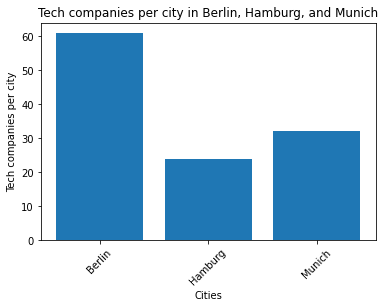

In [36]:
plt.bar(df2['cities'], df2['tech companies per city'])
plt.xlabel('Cities')
plt.ylabel('Tech companies per city')
plt.title('Tech companies per city in Berlin, Hamburg, and Munich')
plt.xticks(rotation=45)
plt.show()

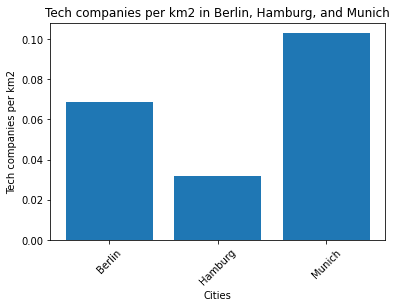

In [37]:
plt.bar(df2['cities'], df2['tech companies per km2'])
plt.xlabel('Cities')
plt.ylabel('Tech companies per km2')
plt.title('Tech companies per km2 in Berlin, Hamburg, and Munich')
plt.xticks(rotation=45)
plt.show()

### **Despite the fact that, according to "companies DataFrame," Berlin has the majority of tech companies, Münich has more companies per square kilometer, which may make the task of finding a suitable location for our tech company easier.**